## hello


In [3]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
#%matplotlib inline 
%matplotlib notebook

<IPython.core.display.Javascript object>


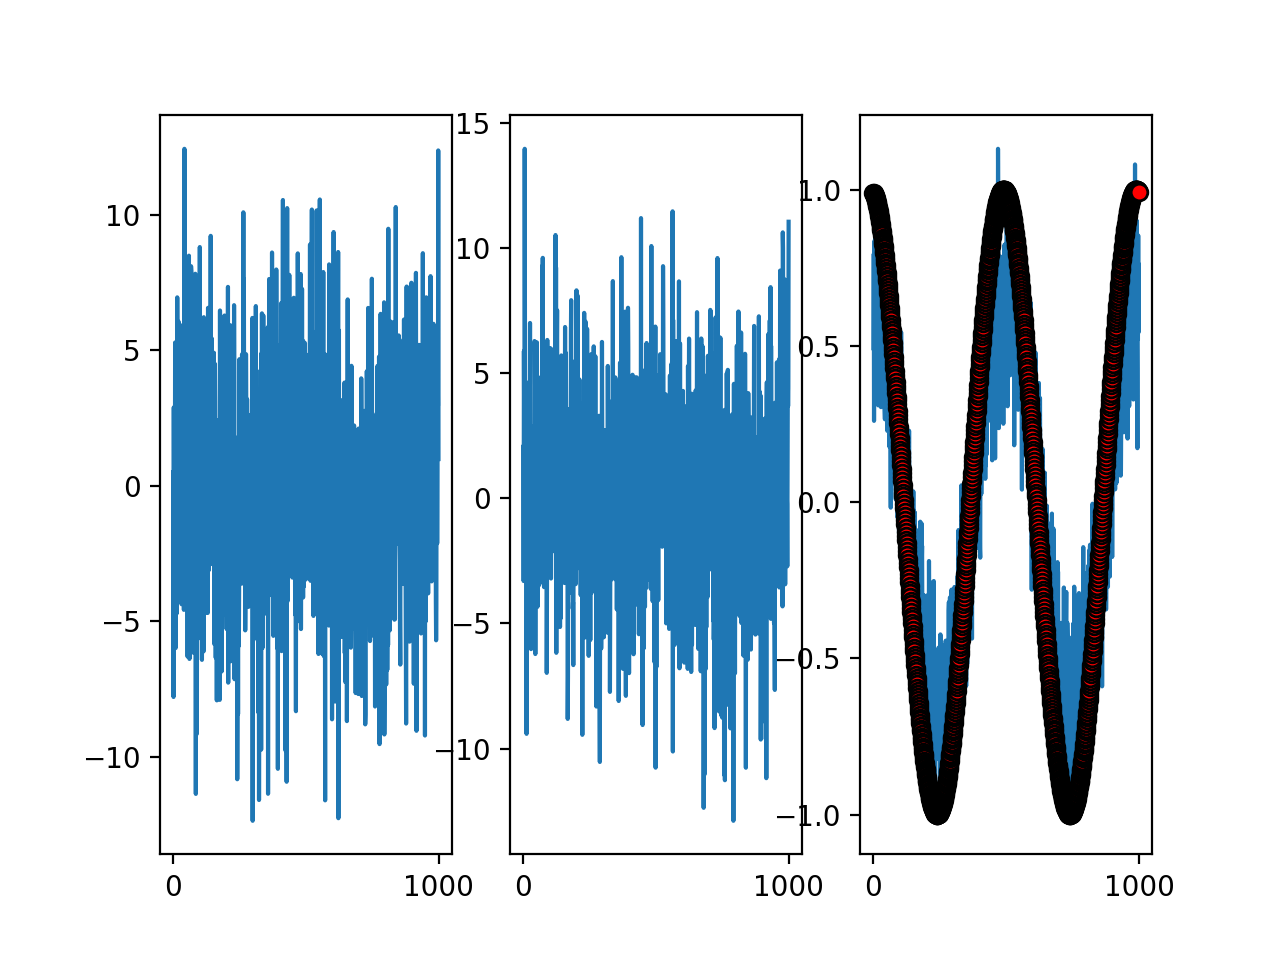

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show>

In [6]:
# signal params
dur, f0, Fs = 1, 2,1000
Ts = 1.0/Fs
t = np.arange(0,dur,Ts,dtype =None)
t = t.reshape(len(t),1)
mu, sigma = 0, 4
# make signal/noise
s = []
n = []
samples = 500
for i in range(samples):
    temp1 = np.sin(2*pi*f0*t+pi*np.random.rand(1,1))
    temp2 = np.random.normal(mu, sigma, (len(t),1))
    s.append(temp1)
    n.append(temp2)
s = np.asarray(s)
n = np.asarray(n)
s = np.squeeze(s, axis=2)
n = np.squeeze(n, axis=2)
# x: instances of several observations (nsamples,ndims)
x = s+n 

# visualize signal
fig, ax = plt.subplots(1,3)

fig=plt.figure(figsize=(0, 1), dpi= 80, facecolor='w', edgecolor='k')
# plt.rcParams['figure.figsize'] = [10, 5]
ax[0].plot(x[0,:])
ax[1].plot(x[1,:])
ax[2].plot(np.sum(x,0)/x.shape[0])
ax[2].plot(s[0,:],'ro-')
plt.show






<IPython.core.display.Javascript object>


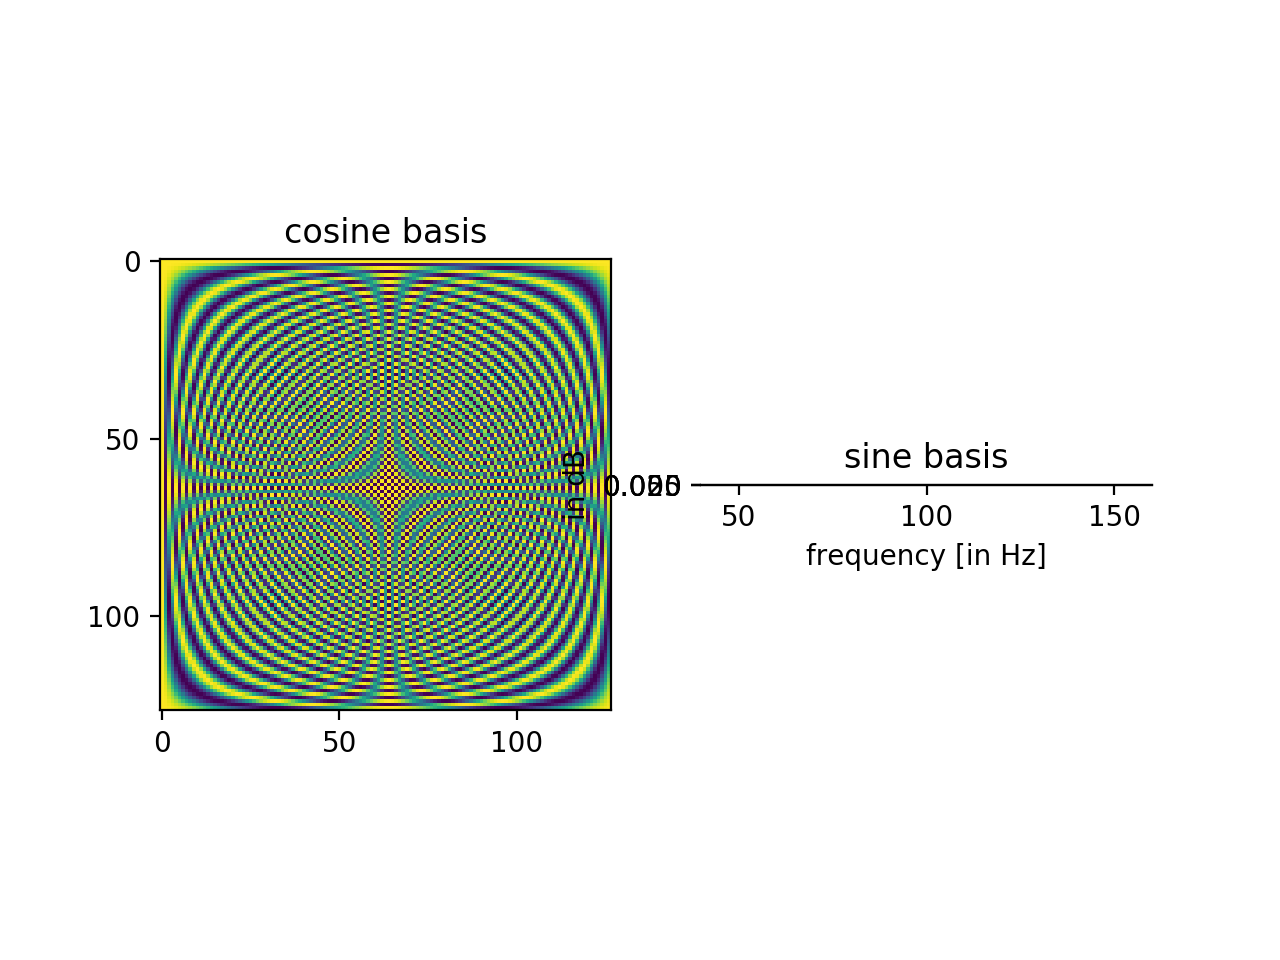

<function matplotlib.pyplot.show>

In [7]:
# visualize DFT basis
nfft = 128
temp_1 = np.arange(0,nfft-1)
temp_2 = np.arange(0,nfft-1)

temp_1 = temp_1.reshape((len(temp_1),1))  
temp_2 = temp_2.reshape((len(temp_2),1))  

F = np.matmul(temp_1,temp_2.T)
G = np.exp(-1j*2*pi*F/nfft)

fig, ax = plt.subplots(1,2)

ax[0].imshow(np.real(G))
ax[1].imshow(np.imag(G))
ax[0].set_title("cosine basis")
ax[1].set_title("sine basis")
plt.style.use('classic')
plt.show

<IPython.core.display.Javascript object>


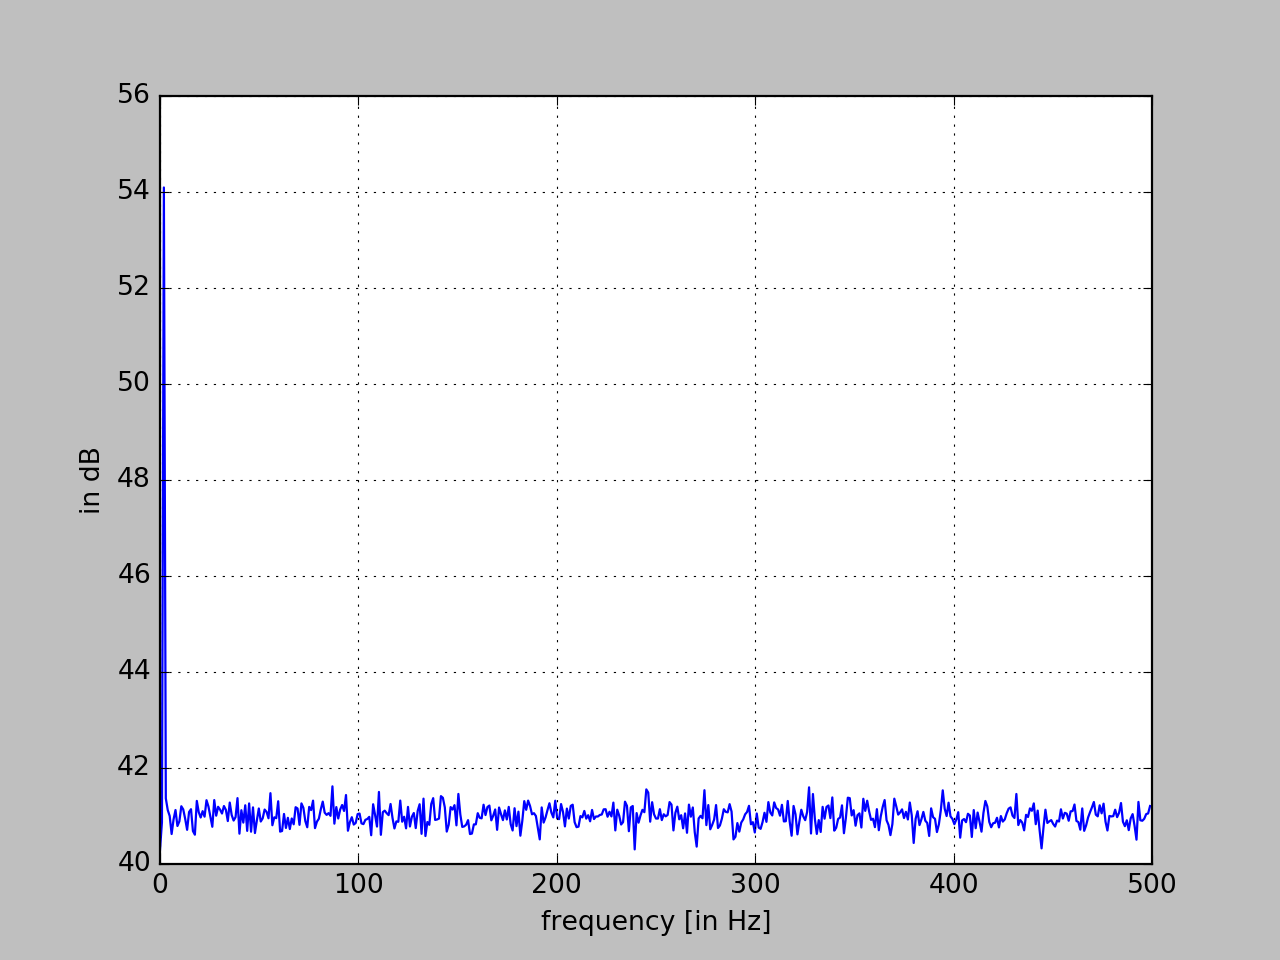

In [12]:
# basic DFT analysis
def nextpow2(i):
    n = 1
    while n < i: n *= 2
    return n

nfft = nextpow2(Fs)
X = np.fft.fft(x,nfft)
faxis = np.arange(0,nfft/2,1)/nfft*Fs
avg_X = np.sum(np.abs(X),0)/X.shape[0]
plt.plot(faxis,20*np.log10(avg_X[0:len(faxis)]))
plt.ylabel('in dB')
plt.xlabel('frequency [in Hz]')
plt.grid(True)
# plt.axis([0, 500, 0, 50])
plt.show()

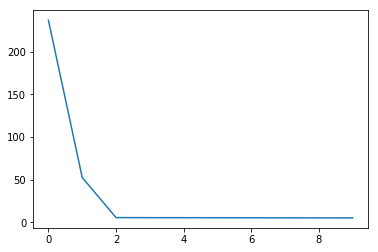

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)
pca.fit_transform(x)
a = pca.explained_variance_
plt.plot(a[0:10])